In [1]:
# !unzip pzd_5.zip

Archive:  pzd_5.zip
   creating: pzd_5/
  inflating: pzd_5/2022-01-01.csv    
  inflating: pzd_5/2022-01-02.csv    
  inflating: pzd_5/2022-01-03.csv    
  inflating: pzd_5/2022-01-04.csv    
  inflating: pzd_5/2022-01-05.csv    
  inflating: pzd_5/2022-01-06.csv    
  inflating: pzd_5/2022-01-07.csv    
  inflating: pzd_5/2022-01-08.csv    
  inflating: pzd_5/2022-01-09.csv    
  inflating: pzd_5/2022-01-10.csv    
  inflating: pzd_5/2022-01-12.csv    
  inflating: pzd_5/2022-01-13.csv    
  inflating: pzd_5/2022-01-21.csv    
  inflating: pzd_5/2022-01-22.csv    
  inflating: pzd_5/2022-01-23.csv    
  inflating: pzd_5/2022-01-24.csv    
  inflating: pzd_5/2022-01-25.csv    
  inflating: pzd_5/2022-01-26.csv    
  inflating: pzd_5/2022-01-27.csv    
  inflating: pzd_5/2022-01-28.csv    
  inflating: pzd_5/2022-01-29.csv    
  inflating: pzd_5/2022-01-30.csv    
  inflating: pzd_5/2022-01-31.csv    
  inflating: pzd_5/2023-01-01.csv    
  inflating: pzd_5/2023-01-02.csv    
  inflatin

In [19]:
import os
import pandas as pd
import numpy as np
from prepair import prepair_dataset
from calc_features import create_features
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt

In [2]:
# Укажите путь к папке
folder_path = 'pzd_5'
# Получаем список файлов в папке
files = os.listdir(folder_path)

### Проверка аномалий в данных и их обработка

In [3]:
second_file = files[1]
print(second_file)

file_path = os.path.join(folder_path, second_file)
df = pd.read_csv(file_path)

2022-01-02.csv


In [4]:
print(f'Кол-во дубликатов данных в файле: {df.duplicated().sum()}')
print(f'Кол-во пропущенных значений в файле: {df.isna().sum().sum()}')
df.isna().sum()

Кол-во дубликатов данных в файле: 0
Кол-во пропущенных значений в файле: 12


days_to_otp                          0
pzd_kolmst_К                         0
pzd_count_vag_К                      0
kolsvm_К                             0
pzd_kolmst_Л                         4
pzd_count_vag_Л                      0
kolsvm_Л                             1
pzd_kolmst_М                         0
pzd_count_vag_М                      0
kolsvm_М                             4
pzd_count_vag_О                      0
pzd_kolmst_О                         0
kolsvm_О                             0
pzd_count_vag_П                      0
pzd_kolmst_П                         0
kolsvm_П                             0
pzd_count_vag_С                      0
pzd_kolmst_С                         0
kolsvm_С                             0
cum_count_tickets_by_pzd             0
cum_count_tickets_lgot_255_by_pzd    0
cum_count_tickets_lgot_by_pzd        0
year_dateotp                         0
month_dateotp                        3
dow_dateotp                          0
season                   

In [5]:
columns_with_na = df.isna().sum()[df.isna().sum() > 0].index
df[columns_with_na].head()

df[columns_with_na] = df[columns_with_na].ffill()
columns_with_na = df.isna().sum()[df.isna().sum() > 0].index
print(f'Кол-во пропущенных значений в файле: {df.isna().sum().sum()}')

Кол-во пропущенных значений в файле: 0


In [6]:
second_file = files[2]
print(second_file)

file_path = os.path.join(folder_path, second_file)
df = pd.read_csv(file_path)

# Проверка числовых данных на допустимый диапазон
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    min_val, max_val = df[column].min(), df[column].max()
    print(f"Диапазон значений в столбце {column}: [{min_val}, {max_val}]")

2022-01-03.csv
Диапазон значений в столбце days_to_otp: [0, 90]
Диапазон значений в столбце pzd_kolmst_К: [850.0, 8500.0]
Диапазон значений в столбце pzd_count_vag_К: [14.0, 14.0]
Диапазон значений в столбце kolsvm_К: [158.0, 8500.0]
Диапазон значений в столбце pzd_kolmst_Л: [0.0, 0.0]
Диапазон значений в столбце pzd_count_vag_Л: [0.0, 0.0]
Диапазон значений в столбце kolsvm_Л: [0.0, 0.0]
Диапазон значений в столбце pzd_kolmst_М: [0.0, 0.0]
Диапазон значений в столбце pzd_count_vag_М: [0.0, 0.0]
Диапазон значений в столбце kolsvm_М: [0.0, 0.0]
Диапазон значений в столбце pzd_count_vag_О: [-0.0664297810595067, 0.0725689724762148]
Диапазон значений в столбце pzd_kolmst_О: [-0.033337334917752, 0.0282890772369353]
Диапазон значений в столбце kolsvm_О: [0.0, 0.0]
Диапазон значений в столбце pzd_count_vag_П: [0.0, 0.0]
Диапазон значений в столбце pzd_kolmst_П: [0.0, 0.0]
Диапазон значений в столбце kolsvm_П: [0.0, 0.0]
Диапазон значений в столбце pzd_count_vag_С: [0.0, 0.0]
Диапазон значений

In [8]:
df[df.columns[:-4]] = df[df.columns[:-4]].round().abs()

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    min_val, max_val = df[column].min(), df[column].max()
    print(f"Диапазон значений в столбце {column}: [{min_val}, {max_val}]")

Диапазон значений в столбце days_to_otp: [0, 90]
Диапазон значений в столбце pzd_kolmst_К: [850.0, 8500.0]
Диапазон значений в столбце pzd_count_vag_К: [14.0, 14.0]
Диапазон значений в столбце kolsvm_К: [158.0, 8500.0]
Диапазон значений в столбце pzd_kolmst_Л: [0.0, 0.0]
Диапазон значений в столбце pzd_count_vag_Л: [0.0, 0.0]
Диапазон значений в столбце kolsvm_Л: [0.0, 0.0]
Диапазон значений в столбце pzd_kolmst_М: [0.0, 0.0]
Диапазон значений в столбце pzd_count_vag_М: [0.0, 0.0]
Диапазон значений в столбце kolsvm_М: [0.0, 0.0]
Диапазон значений в столбце pzd_count_vag_О: [0.0, 0.0]
Диапазон значений в столбце pzd_kolmst_О: [0.0, 0.0]
Диапазон значений в столбце kolsvm_О: [0.0, 0.0]
Диапазон значений в столбце pzd_count_vag_П: [0.0, 0.0]
Диапазон значений в столбце pzd_kolmst_П: [0.0, 0.0]
Диапазон значений в столбце kolsvm_П: [0.0, 0.0]
Диапазон значений в столбце pzd_count_vag_С: [0.0, 0.0]
Диапазон значений в столбце pzd_kolmst_С: [0.0, 0.0]
Диапазон значений в столбце kolsvm_С: [0

In [9]:
const_columns_pzd = [
    'pzd_kolmst_К','pzd_count_vag_К',
    'pzd_kolmst_Л','pzd_count_vag_Л',
    'pzd_kolmst_М','pzd_count_vag_М',
    'pzd_kolmst_О','pzd_count_vag_О',
    'pzd_kolmst_П','pzd_count_vag_П',
    'pzd_kolmst_С','pzd_count_vag_С',
]
const_columns_date = [
    'year_dateotp','month_dateotp', 'dow_dateotp','season',
    'is_holyday', 'is_pre_holyday','cat_pre_holyday', 'school_holyday'
]
columns_pzd = [
    'kolsvm_К','kolsvm_Л','kolsvm_М',
    'kolsvm_О','kolsvm_П','kolsvm_С'
]

columns_cumcount = [
    'cum_count_tickets_by_pzd',
    'cum_count_tickets_lgot_255_by_pzd',
    'cum_count_tickets_lgot_by_pzd'
]
target_columns = [
    'target_count_tickets_lgot_255', 'target_count_tickets_lgot',
    'delta_tickets_lgot_255','delta_tickets_lgot'
]
const_columns = const_columns_pzd + const_columns_date
variable_columns = columns_pzd + columns_cumcount

In [10]:
for col in const_columns:
    df[col] = df[col].median()
for column in df[const_columns].select_dtypes(include=['float64', 'int64']).columns:
    min_val, max_val = df[column].min(), df[column].max()
    print(f"Диапазон значений в столбце {column}: [{min_val}, {max_val}]")

Диапазон значений в столбце pzd_kolmst_К: [850.0, 850.0]
Диапазон значений в столбце pzd_count_vag_К: [14.0, 14.0]
Диапазон значений в столбце pzd_kolmst_Л: [0.0, 0.0]
Диапазон значений в столбце pzd_count_vag_Л: [0.0, 0.0]
Диапазон значений в столбце pzd_kolmst_М: [0.0, 0.0]
Диапазон значений в столбце pzd_count_vag_М: [0.0, 0.0]
Диапазон значений в столбце pzd_kolmst_О: [0.0, 0.0]
Диапазон значений в столбце pzd_count_vag_О: [0.0, 0.0]
Диапазон значений в столбце pzd_kolmst_П: [0.0, 0.0]
Диапазон значений в столбце pzd_count_vag_П: [0.0, 0.0]
Диапазон значений в столбце pzd_kolmst_С: [0.0, 0.0]
Диапазон значений в столбце pzd_count_vag_С: [0.0, 0.0]
Диапазон значений в столбце year_dateotp: [2022.0, 2022.0]
Диапазон значений в столбце month_dateotp: [1.0, 1.0]
Диапазон значений в столбце dow_dateotp: [1.0, 1.0]
Диапазон значений в столбце season: [0.0, 0.0]
Диапазон значений в столбце is_holyday: [1.0, 1.0]
Диапазон значений в столбце is_pre_holyday: [0.0, 0.0]
Диапазон значений в ст

In [11]:
df['cum_count_tickets_lgot_255_by_pzd'] = df['target_count_tickets_lgot_255'].cumsum().shift(1, fill_value=0)
df['cum_count_tickets_lgot_by_pzd'] = df['target_count_tickets_lgot'].cumsum().shift(1, fill_value=0)
df['cum_count_tickets_by_pzd'] = df['cum_count_tickets_lgot_255_by_pzd'] + df['cum_count_tickets_lgot_by_pzd']

In [12]:
for column in df[columns_pzd].select_dtypes(include=['float64', 'int64']).columns:
    min_val, max_val = df[column].min(), df[column].max()
    print(f"Диапазон значений в столбце {column}: [{min_val}, {max_val}]")

Диапазон значений в столбце kolsvm_К: [158.0, 8500.0]
Диапазон значений в столбце kolsvm_Л: [0.0, 0.0]
Диапазон значений в столбце kolsvm_М: [0.0, 0.0]
Диапазон значений в столбце kolsvm_О: [0.0, 0.0]
Диапазон значений в столбце kolsvm_П: [0.0, 0.0]
Диапазон значений в столбце kolsvm_С: [0.0, 0.0]


In [13]:
df[df['kolsvm_К'] == 8500]

,days_to_otp,pzd_kolmst_К,pzd_count_vag_К,kolsvm_К,pzd_kolmst_Л,pzd_count_vag_Л,kolsvm_Л,pzd_kolmst_М,pzd_count_vag_М,kolsvm_М,...,dow_dateotp,season,is_holyday,is_pre_holyday,cat_pre_holyday,school_holyday,target_count_tickets_lgot_255,target_count_tickets_lgot,delta_tickets_lgot_255,delta_tickets_lgot
13,77,850.0,14.0,8500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,2,3,606,187
90,0,850.0,14.0,8500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,90,4,90,4


In [14]:
for col in columns_pzd:
    if df[col].dtype in [int, float]:
        type_vag = col.split('_')[1]
        threshold_value = df[f'pzd_kolmst_{type_vag}'].median()
        drop_index = df[df[col] > threshold_value].index        
        df.drop(drop_index, axis=0, inplace=True)

In [15]:
for column in df[columns_pzd].select_dtypes(include=['float64', 'int64']).columns:
    min_val, max_val = df[column].min(), df[column].max()
    print(f"Диапазон значений в столбце {column}: [{min_val}, {max_val}]")

Диапазон значений в столбце kolsvm_К: [158.0, 850.0]
Диапазон значений в столбце kolsvm_Л: [0.0, 0.0]
Диапазон значений в столбце kolsvm_М: [0.0, 0.0]
Диапазон значений в столбце kolsvm_О: [0.0, 0.0]
Диапазон значений в столбце kolsvm_П: [0.0, 0.0]
Диапазон значений в столбце kolsvm_С: [0.0, 0.0]


### Добавление новых фичей данных

In [4]:
for name_files in files:
    file_path = os.path.join(folder_path, name_files)    
    df = pd.read_csv(file_path)    
    df_prep = prepair_dataset(df)
    break

In [5]:
target_columns = [
    'target_count_tickets_lgot_255', 'target_count_tickets_lgot',
    'delta_tickets_lgot_255','delta_tickets_lgot'
]

target_column = ['target_count_tickets_lgot_255', 'delta_tickets_lgot_255']

drop_columns = df_prep[target_columns].columns.difference(target_column)
df_prep = df_prep.drop(drop_columns, axis=1)

In [6]:
df_prep.head()

,days_to_otp,pzd_kolmst_К,pzd_count_vag_К,kolsvm_К,pzd_kolmst_Л,pzd_count_vag_Л,kolsvm_Л,pzd_kolmst_М,pzd_count_vag_М,kolsvm_М,...,year_dateotp,month_dateotp,dow_dateotp,season,is_holyday,is_pre_holyday,cat_pre_holyday,school_holyday,target_count_tickets_lgot_255,delta_tickets_lgot_255
0,90,850.0,14.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2022.0,1.0,6.0,0.0,1.0,0.0,0.0,0.0,0,479
1,89,850.0,14.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2022.0,1.0,6.0,0.0,1.0,0.0,0.0,0.0,0,479
2,88,850.0,14.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2022.0,1.0,6.0,0.0,1.0,0.0,0.0,0.0,1,479
3,87,850.0,14.0,848.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2022.0,1.0,6.0,0.0,1.0,0.0,0.0,0.0,0,478
4,86,850.0,14.0,848.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2022.0,1.0,6.0,0.0,1.0,0.0,0.0,0.0,2,478


Формирование фичей окнами, для каждого типа вагона определять заполняемость, высчитать общую заполняемость

In [7]:
# Создаем словарь для хранения новых признаков
new_columns = {}

# Определяем размеры окон
window_sizes = [1, 3, 7, 14, 30]

Пример из окна длиной 3 дня

In [8]:
target_col = 'target_count_tickets_lgot_255'
window = window_sizes[1]
# Заменяем отрицательные значения нулями
df.loc[df[target_col] < 0, target_col] = 0

In [9]:
# Сумма проданных билетов за последние `window` дней
name_col = f'sum_{window}_days'
new_columns[name_col] = (
    df_prep.shift(1)[target_col]
          .rolling(window=window, min_periods=1).sum()
          .reset_index(level=0, drop=True).fillna(0)
)

# Среднее количество проданных билетов за последние `window` дней
name_col = f'mean_{window}_days'
new_columns[name_col] = (
    df_prep.shift(1)[target_col]
          .rolling(window=window, min_periods=1).mean()
          .reset_index(level=0, drop=True).fillna(0).astype('float16')
)

# Медиана количества проданных билетов за последние `window` дней
name_col = f'median_{window}_days'
new_columns[name_col] = (
    df_prep.shift(1)[target_col]
          .rolling(window=window, min_periods=1).median()
          .reset_index(level=0, drop=True).fillna(0)
)

# Темпы роста продаж (отношение текущих продаж к продажам за предыдущий день)
name_col = f'growth_rate'
new_columns[name_col] = (
    df_prep[target_col].shift(1).pct_change()
              .replace([np.inf, -np.inf], np.nan).fillna(0).astype('float16')
)

# Преобразуем словарь новых столбцов в DataFrame
new_df = pd.DataFrame(new_columns)

In [10]:
new_df.head()

,sum_3_days,mean_3_days,median_3_days,growth_rate
0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.0,0.0
3,1.0,0.333252,0.0,0.0
4,1.0,0.333252,0.0,-1.0


In [11]:
# Объединяем новые столбцы с основным DataFrame
df_prep = pd.concat([df_prep, new_df], axis=1)
df_prep.head()

,days_to_otp,pzd_kolmst_К,pzd_count_vag_К,kolsvm_К,pzd_kolmst_Л,pzd_count_vag_Л,kolsvm_Л,pzd_kolmst_М,pzd_count_vag_М,kolsvm_М,...,is_holyday,is_pre_holyday,cat_pre_holyday,school_holyday,target_count_tickets_lgot_255,delta_tickets_lgot_255,sum_3_days,mean_3_days,median_3_days,growth_rate
0,90,850.0,14.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,479,0.0,0.000000,0.0,0.0
1,89,850.0,14.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,479,0.0,0.000000,0.0,0.0
2,88,850.0,14.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1,479,0.0,0.000000,0.0,0.0
3,87,850.0,14.0,848.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,478,1.0,0.333252,0.0,0.0
4,86,850.0,14.0,848.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2,478,1.0,0.333252,0.0,-1.0


In [12]:
const_columns_pzd = [
    'pzd_kolmst_К',
    'pzd_kolmst_Л',
    'pzd_kolmst_М',
    'pzd_kolmst_О',
    'pzd_kolmst_П',
    'pzd_kolmst_С'
]
columns_pzd = [
    'kolsvm_К','kolsvm_Л','kolsvm_М',
    'kolsvm_О','kolsvm_П','kolsvm_С'
]

In [13]:
content_col = []
for col in columns_pzd:
    type_vag = col.split('kolsvm_')[1]
    name_columns = f'content_{type_vag}'
    content_col.append(name_columns)
    df_prep[name_columns] = (
    (df_prep[f'pzd_kolmst_{type_vag}'] - df_prep[col]) / df_prep[f'pzd_kolmst_{type_vag}']
    ).replace([np.inf, -np.inf], 0).fillna(0)

mean_content = []
for col in content_col:
    if df_prep[col].mean() != 0:
        mean_content.append(col)
        
df_prep['global_content'] = df_prep[mean_content].mean(axis=1)

In [14]:
df_prep[const_columns_pzd + columns_pzd + content_col + ['global_content']]

,pzd_kolmst_К,pzd_kolmst_Л,pzd_kolmst_М,pzd_kolmst_О,pzd_kolmst_П,pzd_kolmst_С,kolsvm_К,kolsvm_Л,kolsvm_М,kolsvm_О,kolsvm_П,kolsvm_С,content_К,content_Л,content_М,content_О,content_П,content_С,global_content
0,850.0,0.0,0.0,0.0,0.0,0.0,850.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,850.0,0.0,0.0,0.0,0.0,0.0,850.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,850.0,0.0,0.0,0.0,0.0,0.0,850.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,850.0,0.0,0.0,0.0,0.0,0.0,848.0,0.0,0.0,0.0,0.0,0.0,0.002353,0.0,0.0,0.0,0.0,0.0,0.002353
4,850.0,0.0,0.0,0.0,0.0,0.0,848.0,0.0,0.0,0.0,0.0,0.0,0.002353,0.0,0.0,0.0,0.0,0.0,0.002353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,850.0,0.0,0.0,0.0,0.0,0.0,629.0,0.0,0.0,0.0,0.0,0.0,0.260000,0.0,0.0,0.0,0.0,0.0,0.260000
87,850.0,0.0,0.0,0.0,0.0,0.0,595.0,0.0,0.0,0.0,0.0,0.0,0.300000,0.0,0.0,0.0,0.0,0.0,0.300000
88,850.0,0.0,0.0,0.0,0.0,0.0,541.0,0.0,0.0,0.0,0.0,0.0,0.363529,0.0,0.0,0.0,0.0,0.0,0.363529
89,850.0,0.0,0.0,0.0,0.0,0.0,489.0,0.0,0.0,0.0,0.0,0.0,0.424706,0.0,0.0,0.0,0.0,0.0,0.424706


In [15]:
df_prep.head(1)

,days_to_otp,pzd_kolmst_К,pzd_count_vag_К,kolsvm_К,pzd_kolmst_Л,pzd_count_vag_Л,kolsvm_Л,pzd_kolmst_М,pzd_count_vag_М,kolsvm_М,...,mean_3_days,median_3_days,growth_rate,content_К,content_Л,content_М,content_О,content_П,content_С,global_content
0,90,850.0,14.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Обучение модели

In [3]:
target = 'target_count_tickets_lgot'
train_size = 0.9

train_csv, test_csv = train_test_split(files, train_size=train_size, random_state=42)

In [4]:
df_total = pd.DataFrame()
for name_files in tqdm(train_csv):
    file_path = os.path.join(folder_path, name_files)    
    df = pd.read_csv(file_path)    
    df_prep = prepair_dataset(df)    
    df_prep = create_features(df_prep, target)
    if df_prep.isna().sum().sum() != 0:
        continue
    df_total = pd.concat([df_total, df_prep])

  0%|          | 0/375 [00:00<?, ?it/s]

In [5]:
X = df_total.drop(['target'], axis=1)
Y = df_total['target']

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=39)

In [6]:
model = CatBoostRegressor(
    iterations=3000, depth=3, learning_rate=0.01, 
    task_type="GPU", devices='0:1', 
    loss_function='RMSE', eval_metric='MAE', 
    od_type="Iter", od_wait=200,
    verbose=200
)

In [7]:
model.fit(
X_train, y_train, eval_set=(X_val, y_val),
    use_best_model=True, plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 3.3002589	test: 3.3098855	best: 3.3098855 (0)	total: 34.2ms	remaining: 1m 42s
200:	learn: 2.2518958	test: 2.2484828	best: 2.2484828 (200)	total: 1.84s	remaining: 25.6s
400:	learn: 2.1230418	test: 2.1195805	best: 2.1195805 (400)	total: 3.64s	remaining: 23.6s
600:	learn: 2.0788719	test: 2.0770793	best: 2.0770793 (600)	total: 5.49s	remaining: 21.9s
800:	learn: 2.0609698	test: 2.0622029	best: 2.0622029 (800)	total: 7.58s	remaining: 20.8s
1000:	learn: 2.0489604	test: 2.0537797	best: 2.0537797 (1000)	total: 9.83s	remaining: 19.6s
1200:	learn: 2.0400814	test: 2.0481550	best: 2.0481550 (1200)	total: 11.6s	remaining: 17.4s
1400:	learn: 2.0338430	test: 2.0449547	best: 2.0448046 (1382)	total: 13.4s	remaining: 15.3s
1600:	learn: 2.0274200	test: 2.0421017	best: 2.0420877 (1598)	total: 15.2s	remaining: 13.3s
1800:	learn: 2.0221852	test: 2.0404512	best: 2.0404512 (1800)	total: 17s	remaining: 11.3s
2000:	learn: 2.0174762	test: 2.0379348	best: 2.0379348 (2000)	total: 18.8s	remaining: 9.4s
220

In [8]:
model.save_model("weights/regressor")

<Axes: title={'center': 'Top 15 Feature Importances'}, ylabel='feature'>

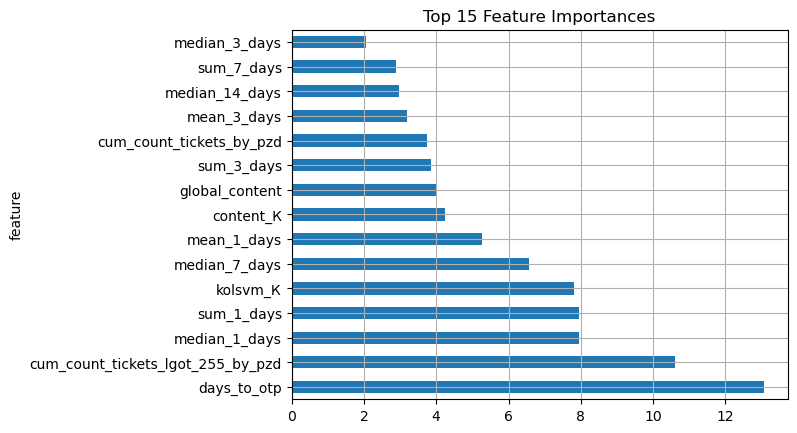

In [9]:
features = model.feature_names_
importances = model.get_feature_importance()

df_importances = pd.DataFrame({
    'feature': features,
    'importance': importances
})

top_15_features = df_importances.sort_values(by='importance', ascending=False).head(15)
top_15_features.set_index('feature').importance.plot.barh(grid=True, title='Top 15 Feature Importances')

In [10]:
path_weights = "weights/regressor"
load_model = CatBoostRegressor()
load_model.load_model(path_weights)

#### Метрика

In [11]:
df_total_test = pd.DataFrame()
for name_files in tqdm(test_csv):
    file_path = os.path.join(folder_path, name_files)    
    df = pd.read_csv(file_path)    
    df_prep = prepair_dataset(df)    
    df_prep = create_features(df_prep, target)
    if df_prep.isna().sum().sum() != 0:
        continue
    df_total_test = pd.concat([df_total, df_prep])

  0%|          | 0/42 [00:00<?, ?it/s]

In [12]:
X = df_total_test.drop(['target'], axis=1)
y_true = df_total_test['target']

In [13]:
y_pred = load_model.predict(X)

In [14]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_true, y_pred)
print(f'Качество работы модели - {MAE}')

Качество работы модели - 2.0065312898154577


#### Пример работы модели

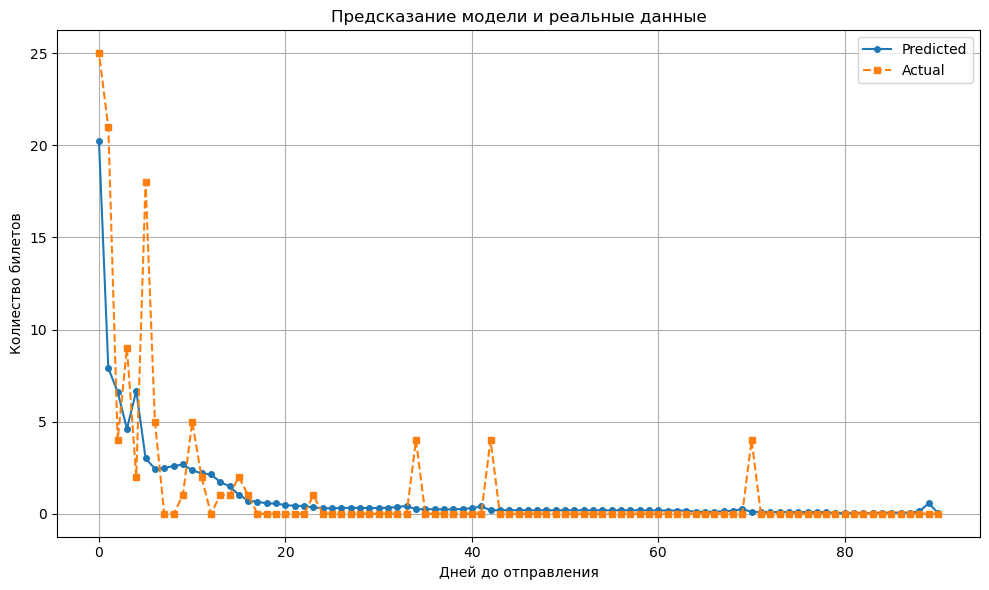

In [20]:
name_files = test_csv[5]

file_path = os.path.join(folder_path, name_files)    
df = pd.read_csv(file_path)    
df_prep = prepair_dataset(df)    
df_prep = create_features(df_prep, target)

X = df_prep.drop(['target'], axis=1)
df_prep['predict'] = load_model.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(df_prep['days_to_otp'], df_prep['predict'], label='Predicted', marker='o', linestyle='-', markersize=4)
plt.plot(df_prep['days_to_otp'], df_prep['target'], label='Actual', marker='s', linestyle='--', markersize=4)

# Подписи
plt.xlabel('Дней до отправления')
plt.ylabel('Колиество билетов')
plt.title('Предсказание модели и реальные данные')
plt.legend()
plt.grid(True)

# Отображение
plt.tight_layout()
plt.show()

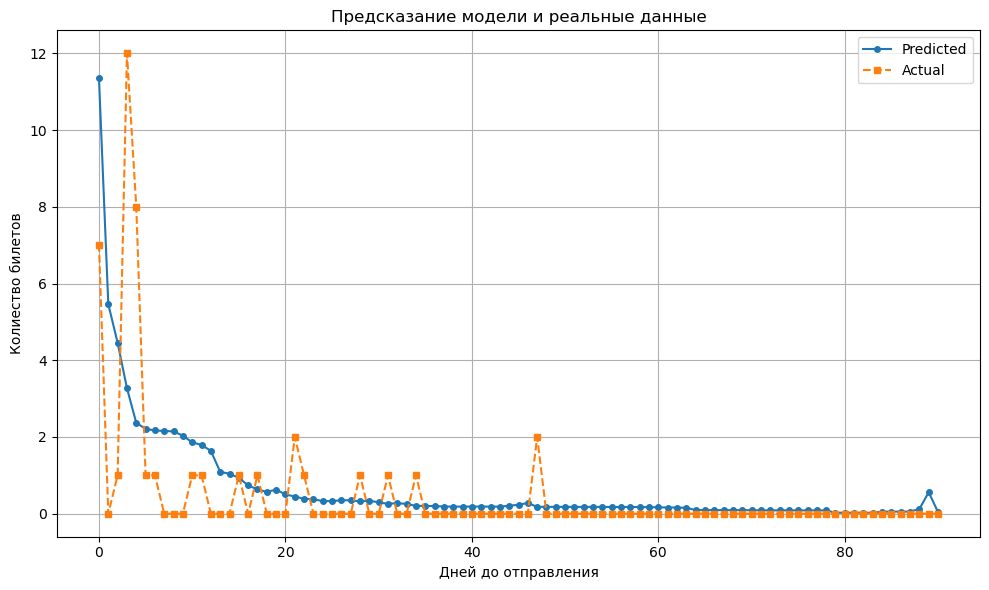

In [21]:
name_files = test_csv[8]

file_path = os.path.join(folder_path, name_files)    
df = pd.read_csv(file_path)    
df_prep = prepair_dataset(df)    
df_prep = create_features(df_prep, target)

X = df_prep.drop(['target'], axis=1)
df_prep['predict'] = load_model.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(df_prep['days_to_otp'], df_prep['predict'], label='Predicted', marker='o', linestyle='-', markersize=4)
plt.plot(df_prep['days_to_otp'], df_prep['target'], label='Actual', marker='s', linestyle='--', markersize=4)

# Подписи
plt.xlabel('Дней до отправления')
plt.ylabel('Колиество билетов')
plt.title('Предсказание модели и реальные данные')
plt.legend()
plt.grid(True)

# Отображение
plt.tight_layout()
plt.show()